In [9]:
import pandas as pd
GB=pd.read_csv('C:/Users/SAMSUNG/Desktop/GBvideos.csv')
US=pd.read_csv('C:/Users/SAMSUNG/Desktop/USvideos.csv')

In [10]:
GB.head()  #영국데이터 이용

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [44]:
gb1 = pd.DataFrame(GB.groupby("category_id")["likes"].mean())
gb2 = pd.DataFrame(GB.groupby("category_id")["likes"].min())
gb3 = pd.DataFrame(GB.groupby("category_id")["likes"].max())

In [12]:
gb4 = pd.DataFrame(GB.groupby("category_id")["comment_count"].mean())
gb5 = pd.DataFrame(GB.groupby("category_id")["comment_count"].min())
gb6 = pd.DataFrame(GB.groupby("category_id")["comment_count"].max())

In [13]:
gb1["index"] = gb1.index
gb2["index"] = gb2.index
gb3["index"] = gb3.index
gb4["index"] = gb4.index
gb5["index"] = gb5.index
gb6["index"] = gb6.index

In [14]:
data1=pd.concat([gb1,gb2,gb3], axis=1)
del data1['index']
data1.columns=['likes_mean','likes_min','likes_max']
data1

,likes_mean,likes_min,likes_max
category_id,,,
1,57205.523089,0,461135
2,24608.506944,61,114841
10,272138.508943,0,5613827
15,28629.913858,147,187524
17,39270.313057,0,1291139
19,9674.447917,54,23791
20,39220.127517,0,1031695
22,46273.495899,0,625174
23,78431.168490,22,1253154


In [15]:
data2=pd.concat([gb4,gb5,gb6], axis=1)
del data2['index']
data2.columns=['comment_count_mean','comment_count_min','comment_count_max']
data2

,comment_count_mean,comment_count_min,comment_count_max
category_id,,,
1,6049.674428,0,50255
2,3507.534722,0,12083
10,21303.849062,0,1228655
15,2630.520599,23,18532
17,5273.322496,0,91663
19,1231.010417,7,2716
20,3449.101790,0,31803
22,6395.471292,0,154958
23,9145.960613,4,205692


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Category ID별 likes(좋아요)의 평균, 최대, 최소 확인하기

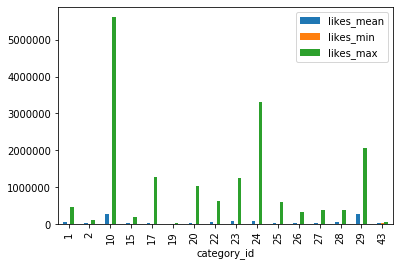

In [17]:
data1.plot.bar()

#매우 큰 값이 있기 때문에 자세하게 보기 위해 로그를 취한다

In [20]:
data1['likes_mean_log'] = np.log(data1['likes_mean'] + 1)
data1['likes_max_log'] = np.log(data1['likes_max'] + 1)
data1['likes_min_log'] = np.log(data1['likes_min'] + 1)

df1=data1[['likes_mean_log','likes_max_log','likes_min_log']]
df1

,likes_mean_log,likes_max_log,likes_min_log
category_id,,,
1,10.954423,13.041448,0.000000
2,10.110888,11.651313,4.127134
10,12.514070,15.540743,0.000000
15,10.262242,12.141667,4.997212
17,10.578250,14.071036,0.000000
19,9.177347,10.077105,4.007333
20,10.576971,13.846715,0.000000
22,10.742346,13.345787,0.000000
23,11.269989,14.041175,3.135494


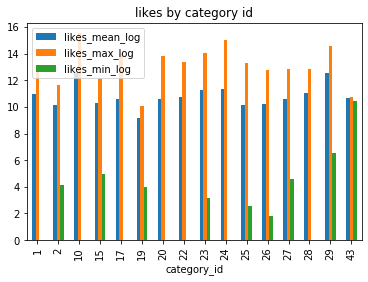

In [40]:
df1.plot.bar(title="likes by category id")

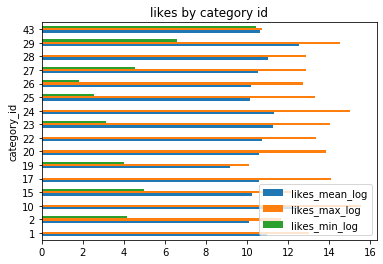

In [56]:
df1.plot.barh(title="likes by category id")

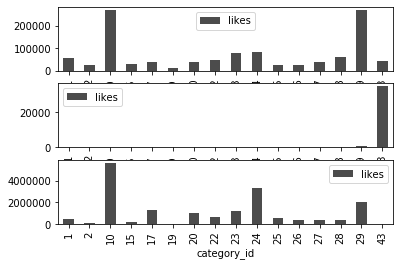

In [45]:
fig, axes = plt.subplots(3, 1)
gb1.plot.bar(ax=axes[0], color='k', alpha=0.7) 
gb2.plot.bar(ax=axes[1], color='k', alpha=0.7)
gb3.plot.bar(ax=axes[2], color='k', alpha=0.7)

카테고리 10번에 해당하는 동영상의 좋아요 평균이 가장 높다

# Category ID별 comment_count(댓글 개수)의 평균, 최대, 최소 확인하기

In [50]:
data2['commentcount_mean_log'] = np.log(data2['comment_count_mean'] + 1)
data2['commentcount_max_log'] = np.log(data2['comment_count_max'] + 1)
data2['commentcount_min_log'] = np.log(data2['comment_count_min'] + 1)

df2=data2[['commentcount_mean_log','commentcount_max_log','commentcount_min_log']]
df2

,commentcount_mean_log,commentcount_max_log,commentcount_min_log
category_id,,,
1,8.707925,10.824885,0.000000
2,8.162954,9.399638,0.000000
10,9.966690,14.021431,0.000000
15,7.875317,9.827308,3.178054
17,8.570606,11.425885,0.000000
19,7.116403,7.907284,2.079442
20,8.146159,10.367347,0.000000
22,8.763502,11.950916,0.000000
23,9.121177,12.234140,1.609438


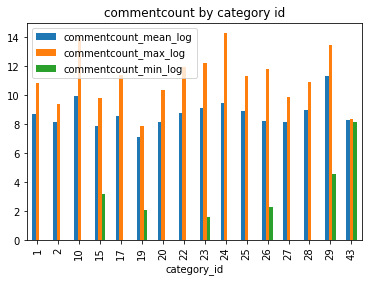

In [54]:
df2.plot.bar(title="commentcount by category id")

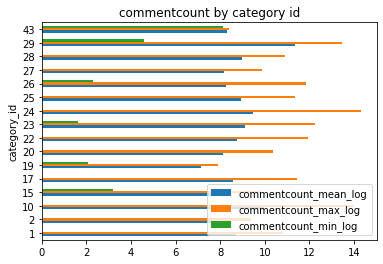

In [53]:
df2.plot.barh(title="commentcount by category id")

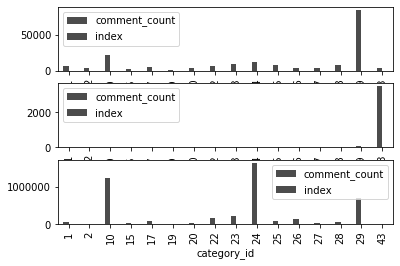

In [41]:
fig, axes = plt.subplots(3, 1)
gb4.plot.bar(ax=axes[0], color='k', alpha=0.7) 
gb5.plot.bar(ax=axes[1], color='k', alpha=0.7)
gb6.plot.bar(ax=axes[2], color='k', alpha=0.7)

카테고리 29번의 동영상에 댓글이 가장 많이 달렸다.